## WORKING WITH DATA SET ,CREATING TEST AND TRAIN SET USING VARIOUS WAYS

### fetching housing data

In [1]:
import os
import urllib
import tarfile
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

fetch_housing_data()

C:\Users\Acer\AppData\Local\Temp\ipykernel_3628\3664258155.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path = housing_path)


### loading housing data from csv file

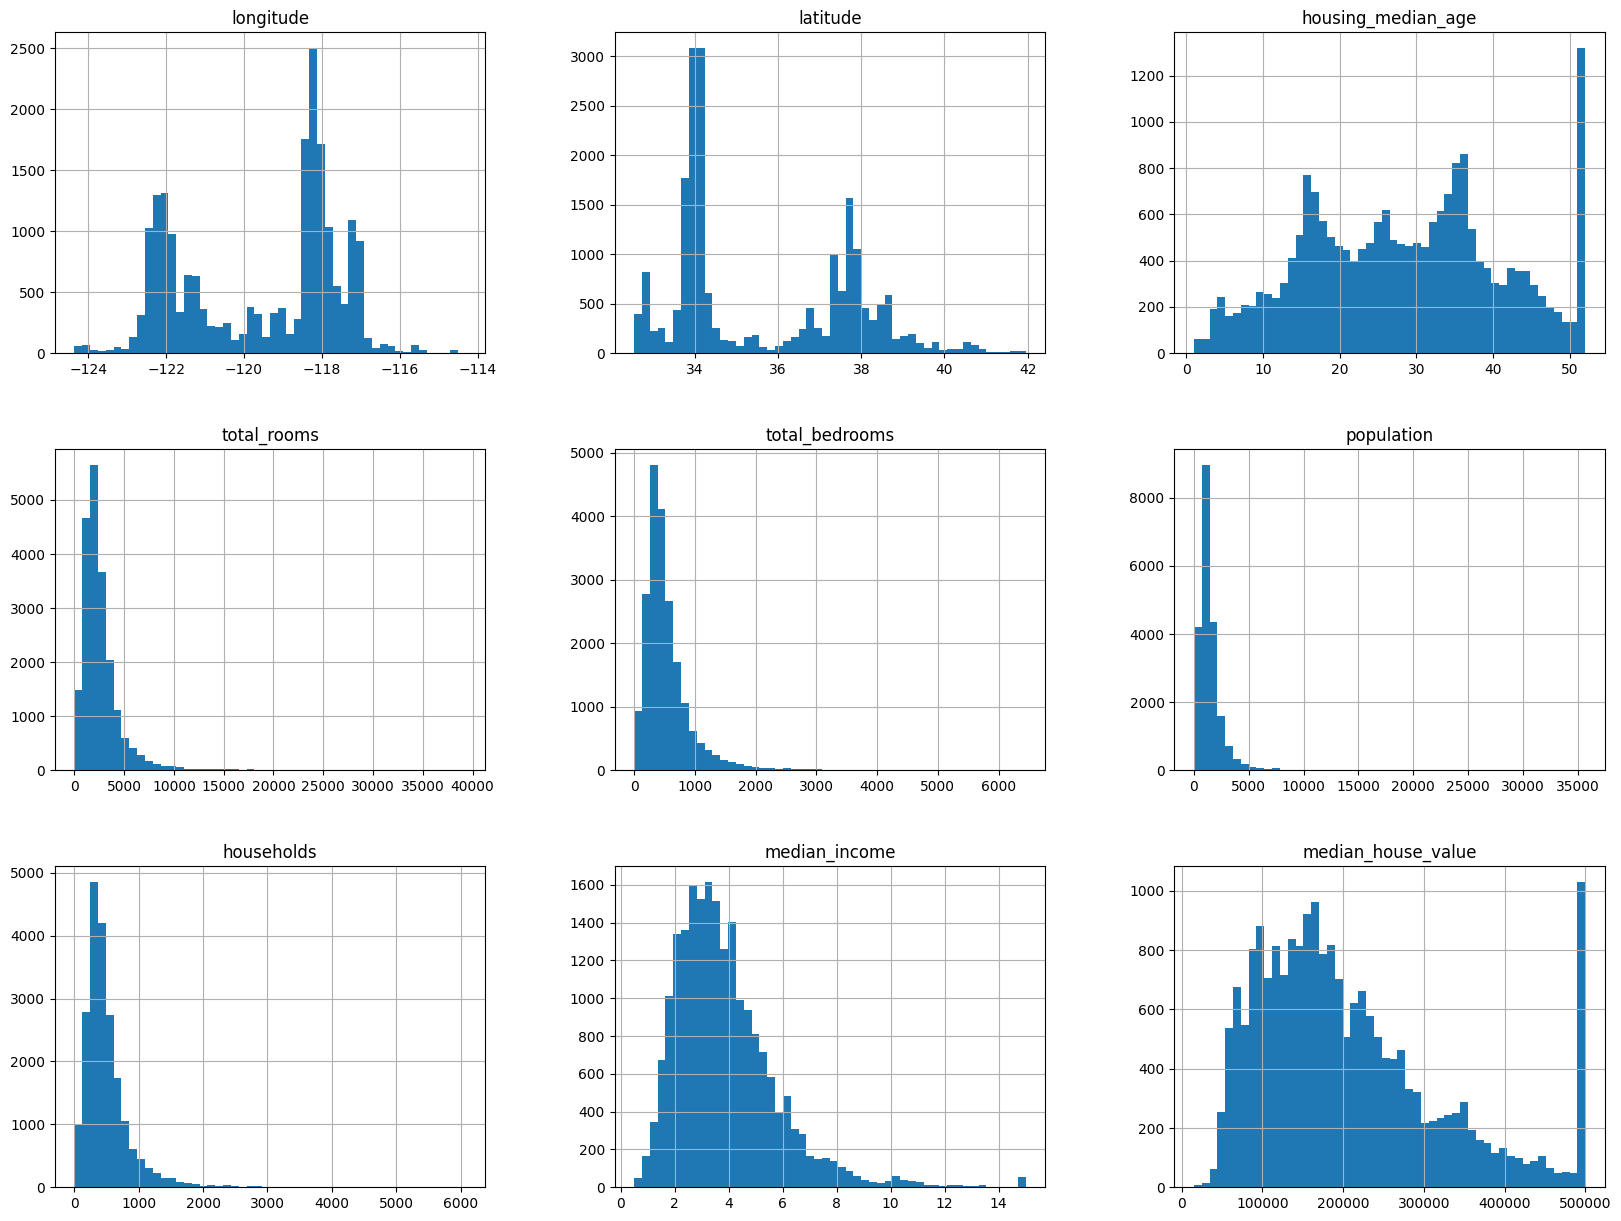

In [2]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
%matplotlib inline  
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### splitting data set into test and train using random (not used)

In [3]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indeces = shuffled_indices[test_set_size:]
    return data.iloc[train_indeces],data.iloc[test_indices]

train_set,test_set = split_train_test(housing,0.2)
    

### splitting data set into test and train using hashed identifier (not used)

In [4]:
from zlib import crc32

def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff <test_ratio * 2**32

def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,'index')

### splitting dataset using scikit-learn built-in function (not used)

In [5]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

### creating income category attribute from median income

<Axes: >

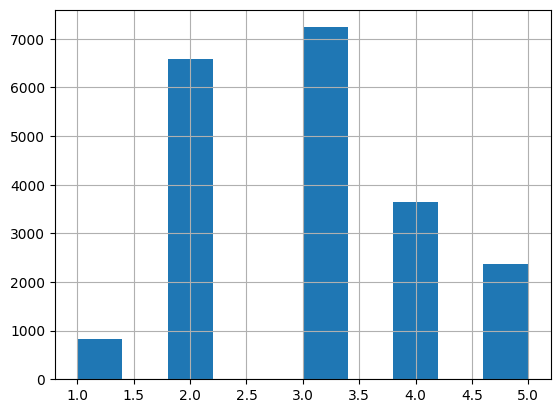

In [6]:
housing["income_cat"] = pd.cut(housing["median_income"],bins = [0.,1.5,3.0,4.5,6.,np.inf],labels = [1,2,3,4,5])
housing["income_cat"].hist()

### stratified sampling using sickit learn

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


# removing income_cat attribute so data os back in original form

for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis = 1,inplace = True)

## DISCOVERING AND VISUALIZING DATA TO GAIN INSIGHTS

### Creating copy of train set to work with

In [8]:
housing = strat_test_set.copy()

### Visualizing geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

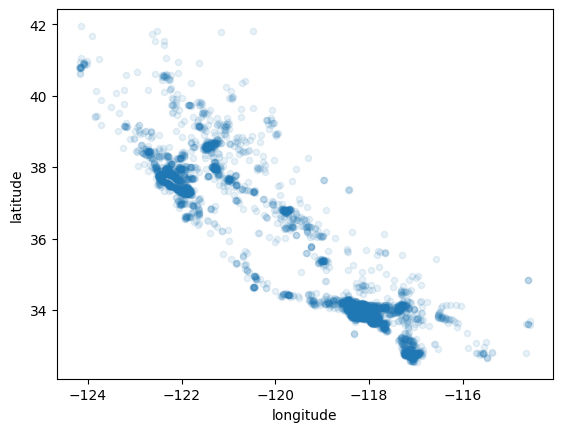

In [9]:
housing.plot(kind ="scatter",x = "longitude",y = "latitude",alpha = 0.1)

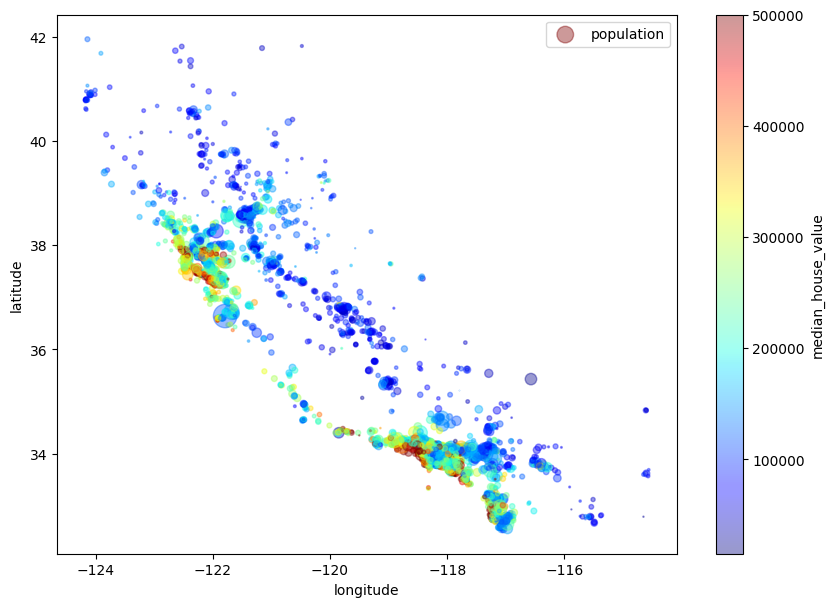

In [10]:
housing.plot(kind = "scatter" ,x = "longitude",y = "latitude",alpha = 0.4,s = housing["population"]/100,label = "population",figsize = (10,7),c = "median_house_value",cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

### standard correlation coefficient (correlation matrix)

In [11]:
numeric_housing = housing.select_dtypes(include=[np.number])
corr_matrix = numeric_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691867
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
latitude             -0.150336
Name: median_house_value, dtype: float64

### using pandas scatter matrix to determine correlations

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

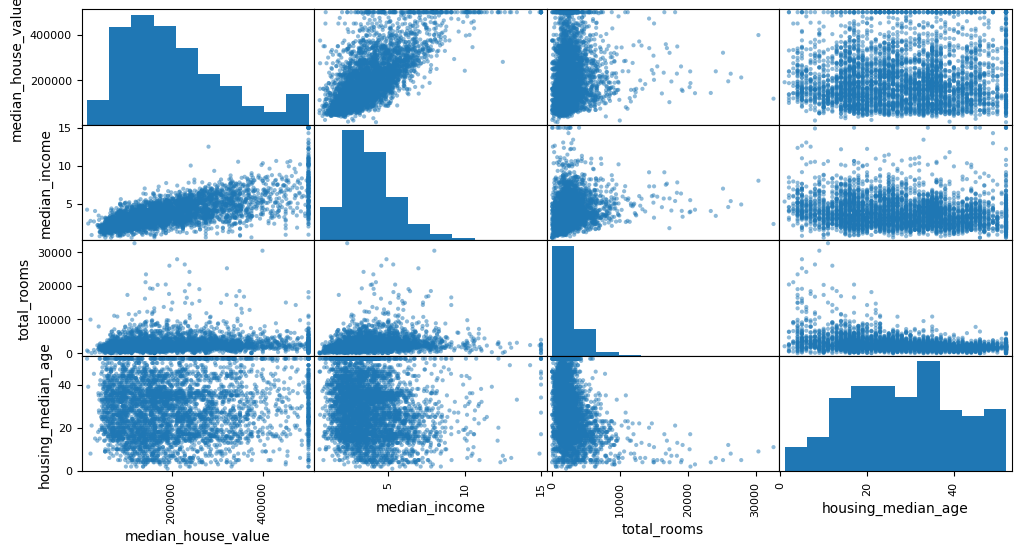

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,6))

<Axes: xlabel='median_income', ylabel='median_house_value'>

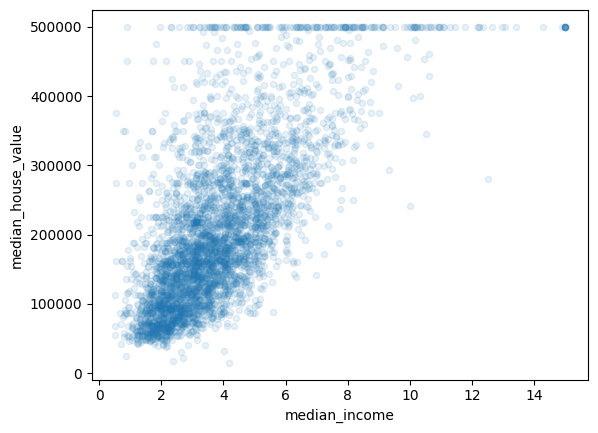

In [13]:
housing.plot(kind = "scatter",x = "median_income" , y = "median_house_value",alpha = 0.1)

## Experimenting with attribute combinations

### creating new attributes

In [14]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
numeric_housing = housing.select_dtypes(include=[np.number])
corr_matrix = numeric_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691867
rooms_per_household         0.192731
total_rooms                 0.131296
housing_median_age          0.071210
households                  0.070947
total_bedrooms              0.057247
population                 -0.016164
longitude                  -0.039848
population_per_household   -0.134999
latitude                   -0.150336
bedrooms_per_room          -0.240481
Name: median_house_value, dtype: float64

## Prepare data for machine learning algorithm

In [29]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### data cleaning

(not used)

In [16]:
# three options to fix missing values in total_bedrooms
housing.dropna(subset=["total_bedrooms"]) # dropping districts with missing values
housing.drop("total_bedrooms",axis=1) # dropping the attribute itself
median = housing["total_bedrooms"].median() # calculating median and filling missing values with it
housing["total_bedrooms"].fillna(median, inplace = True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_3628\1626614814.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace = True)


using scikit_learn for missing values using imputer instance

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

handling text and categorical attributes

using ordinal encoder

In [18]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded


array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

using one hot encoder

In [19]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

### custom Transformers and pipelines

In [20]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
        return self # nothing else to do
 def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
        bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)


num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)



## selecting and training models on data

### linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [ ]:
some_data = housing[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("predictions",lin_reg.predict(some_data_prepared))
print("labels",some_labels)

predictions [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
labels 12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64


calculating rmse for linear regression model


In [ ]:
from sklearn.metrics import mean_squared_error
housing_predicitons = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predicitons)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
# underfitting the data

68627.87390018745


DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_predicitons = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predicitons)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)
# badly overfit the data


0.0


using cross validation 

In [31]:
from sklearn.model_selection import cross_val_score
# for decision tree regressor
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

# for linear regressor
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring = "neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("scores: ",scores)
    print("mean: ",scores.mean())
    print("standard deviation: ",scores.std())

display_scores(tree_rmse_scores)
display_scores(lin_rmse_scores)

scores:  [72819.75760562 71026.06880605 68727.78482148 71568.61920334
 69907.99024417 77501.21685096 71920.72962739 72680.28413731
 69402.53415563 70579.18379563]
mean:  71613.41692475756
standard deviation:  2342.9483730262937
scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
mean:  69104.07998247063
standard deviation:  2880.3282098180666


ensemble learning random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

housing_predicitons = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_predicitons,housing_labels)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

18588.348281458886


In [34]:
# cross validation

forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores:  [51376.97421903 49048.20444237 46752.51426423 52278.02034175
 47298.28472604 51963.44318571 52333.26256974 50027.43341306
 48250.16601765 54081.61355566]
mean:  50340.99167352535
standard deviation:  2317.228720063862


## fine tuning 

### gird serach cv

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

best estimator

In [36]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

test results

In [37]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63557.757401567724 {'max_features': 2, 'n_estimators': 3}
56127.75839080924 {'max_features': 2, 'n_estimators': 10}
52704.3961919526 {'max_features': 2, 'n_estimators': 30}
60423.54320671452 {'max_features': 4, 'n_estimators': 3}
53087.21984788959 {'max_features': 4, 'n_estimators': 10}
50809.48938729389 {'max_features': 4, 'n_estimators': 30}
58967.16375592533 {'max_features': 6, 'n_estimators': 3}
52639.294337280386 {'max_features': 6, 'n_estimators': 10}
50246.48810693391 {'max_features': 6, 'n_estimators': 30}
58992.27211611273 {'max_features': 8, 'n_estimators': 3}
52407.022330387364 {'max_features': 8, 'n_estimators': 10}
50123.690276849935 {'max_features': 8, 'n_estimators': 30}
61752.71979939845 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54187.54353942784 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60147.78609069259 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52507.07141174477 {'bootstrap': False, 'max_features': 3, 'n_estimators':

## Evaluation on test set

In [38]:
final_model = grid_search.best_estimator_
x_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()
x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [39]:
print(final_rmse)

47672.091534579966


In [40]:
from scipy import stats

squared_errors = (final_predictions - y_test)**2
confidence = 0.95
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc = squared_errors.mean(),scale =stats.sem(squared_errors)))

array([45677.91953712, 49586.13000954])

saving the model

In [41]:
from joblib import dump
dump(final_model,"random_forest_model.joblib")

['random_forest_model.joblib']